# Problem 1: Normal random variables with unknown variance

Consider a collection of normal random variables, $X_1, X_2, \ldots, X_N$, $N > 0$, with mean $0$ and variance $\sigma^2$. We write this as

$$
  (X_i \mid \sigma) \sim N(0, \sigma^2), \quad i = 1, 2, \ldots, N.
$$

Suppose that $\sigma$ is unknown. In a Bayesian framework, we can assign a prior distribution to the standard deviation $\sigma$. For simplicity, we choose a uniform prior distribution over the range $0 < \sigma < A$. We write this as:

$$
  p(\sigma) = \frac{1}{A} \quad \text{for} \quad 0 < \sigma < A.
$$

This basically says that any value of $\sigma$ between $0$ and $A$ is equally likely.

## Sampling from the prior and likelihood

We can generate from this prior distribution by drawing a random number from a uniform distribution over the range $0 < \sigma < A$. In `numpy`, this can be done with:

In [7]:
import numpy as np
import matplotlib.pyplot as plt

A = 10

sigma = np.random.uniform(0, A, size=1)
print(sigma)

[8.90426659]


We can draw $K$ samples using numpy as follows:

In [8]:
K = 4
sigma_batch_example = np.random.uniform(0, A, size=K)

print(sigma_batch_example)

[4.68241734 5.87161132 0.05590768 4.6769611 ]


Conditioned on a value of $\sigma$, we can generate $N$ samples $x_1, x_2, \ldots, x_N$ from their distribution (the likelihood) as follows. Equivalently we can let $\mathbf{x} = (x_1, x_2, \ldots, x_N)$ be a random variable drawn from the likelihood.

In [9]:
N = 64
x = np.random.normal(0, sigma, size=N)

print(x)

[ 11.27990409  -6.76362467   1.86130023   9.08558401   4.42790296
 -11.50541675   2.3673751    6.00281348   3.11068535   3.5057253
   0.08686098 -13.35268867 -11.78436741  -8.65302091  -4.32375187
 -16.43611109  12.95314483  -9.4450045   14.3672293    1.61459469
   6.13654506 -12.37666206   6.95685953  16.3481299   -1.27514807
  -4.7953011   -2.65546951  -3.91043485  -0.7802816   20.60886594
   1.19491038  -3.16569917  -1.01134641   0.77810267  -6.65455633
  -3.82663609   3.19588589   6.72702893  31.05202637  -7.3211523
  11.94094506   0.98932327  -1.30554567  -0.38464882   5.37231591
   0.91813723  -5.16111225  -1.40077481  -0.79786647  12.80580579
  -5.31208232  -1.3040989    7.69527828  -8.2006124  -12.58565165
   1.56140828   4.95136148  10.76766901   6.19918609  -0.54841816
 -11.99838451  -8.80443034   9.14996731  -1.77830111]


For a batch of $K$ values of $\sigma_k$, $k = 1, 2, \ldots, K$, we can generate $K$ batches of $\mathbf{x}_k$, where each batch has standard deviation $\sigma_k$ as follows:

In [10]:
x_batch_example = np.random.normal(0, sigma_batch_example.reshape(-1, 1), size=(K, N))

print(x_batch_example.shape)

(4, 64)


We can see compute the empirical standard deviation of each batch to see how it varies with $\sigma$ as follows:

In [11]:
x_batch_example_std = np.std(x_batch_example, axis=1)

print(sigma_batch_example)
print(x_batch_example_std)

[4.68241734 5.87161132 0.05590768 4.6769611 ]
[3.93546539 6.26725722 0.05444129 4.19238452]


As expected, the empirical standard deviation is close to the true standard deviation for each batch.

## Sampling from the posterior with Stan

Now, to do posterior inference, we can find the posterior distribution of $\sigma$ given the data $\mathbf{x}$ as follows:

$$
  p(\sigma \mid \mathbf{x}) = \frac{p(\mathbf{x} \mid \sigma) p(\sigma)}{p(\mathbf{x})} \propto p(\mathbf{x} \mid \sigma) p(\sigma)
$$

This can be simplified to:

$$
  p(\sigma \mid \mathbf{x}) \propto \prod_{i=1}^N \frac{1}{\sigma} \exp\left(-\frac{x_i^2}{2\sigma^2}\right) \frac{1}{A} \text{ for } 0 < \sigma < A, \text{ or } 0 \text{ otherwise.}
$$

While it is possible to sample from this distribution directly, for the purposes of this exercise we will use Stan to sample from this distribution. That will give a collection of samples $\sigma^{[1]}, \sigma^{[2]}, \ldots, \sigma^{[S]}$, which we can use to approximate the posterior distribution.

Stan models are specified in a language called Stan. You can see an eample in `p1_normal_variance.stan`, which matches the mathematical formulation above. Below we load this model using the `cmdstanpy` package (this may take some time):

In [12]:
from cmdstanpy import CmdStanModel

model = CmdStanModel(stan_file='p1_normal_variance.stan')

00:44:11 - cmdstanpy - INFO - compiling stan file C:\Users\kaima\OneDrive\Documents\GitHub\honours_project\0_Exercises\p1_normal_variance.stan to exe file C:\Users\kaima\OneDrive\Documents\GitHub\honours_project\0_Exercises\p1_normal_variance.exe


ValueError: Failed to compile Stan model 'C:\Users\kaima\OneDrive\Documents\GitHub\honours_project\0_Exercises\p1_normal_variance.stan'. Console:
'cut' is not recognized as an internal or external command,
operable program or batch file.
'cut' is not recognized as an internal or external command,
operable program or batch file.
process_begin: CreateProcess(NULL, expr >= 8, ...) failed.
makefile:124: pipe: Bad file descriptor
The system cannot find the file specified.
The system cannot find the path specified.
''
'--- Translating Stan model to C++ code ---'
bin/stanc.exe --filename-in-msg=p1_normal_variance.stan --o=C:/Users/kaima/OneDrive/Documents/GitHub/honours_project/0_Exercises/p1_normal_variance.hpp C:/Users/kaima/OneDrive/Documents/GitHub/honours_project/0_Exercises/p1_normal_variance.stan
''
'--- Compiling C++ code ---'
g++ -std=c++17 -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-context -Wno-attributes -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.84.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials  -D_USE_MATH_DEFINES -D_GLIBCXX11_USE_C99_COMPLEX  -DBOOST_DISABLE_ASSERTS          -c  -x c++ -o C:/Users/kaima/OneDrive/Documents/GitHub/honours_project/0_Exercises/p1_normal_variance.o C:/Users/kaima/OneDrive/Documents/GitHub/honours_project/0_Exercises/p1_normal_variance.hpp
In file included from stan/lib/stan_math/lib/boost_1.84.0/boost/numeric/ublas/traits.hpp:21,
                 from stan/lib/stan_math/lib/boost_1.84.0/boost/numeric/ublas/storage.hpp:27,
                 from stan/lib/stan_math/lib/boost_1.84.0/boost/numeric/ublas/vector.hpp:21,
                 from stan/lib/stan_math/lib/boost_1.84.0/boost/numeric/odeint/util/ublas_wrapper.hpp:23,
                 from stan/lib/stan_math/lib/boost_1.84.0/boost/numeric/odeint.hpp:25,
                 from stan/lib/stan_math/stan/math/prim/functor/ode_rk45.hpp:9,
                 from stan/lib/stan_math/stan/math/prim/functor/integrate_ode_rk45.hpp:6,
                 from stan/lib/stan_math/stan/math/prim/functor.hpp:16,
                 from stan/lib/stan_math/stan/math/rev/fun.hpp:189,
                 from stan/lib/stan_math/stan/math/rev.hpp:14,
                 from stan/lib/stan_math/stan/math.hpp:19,
                 from stan/src/stan/model/model_header.hpp:6,
                 from C:/Users/kaima/OneDrive/Documents/GitHub/honours_project/0_Exercises/p1_normal_variance.hpp:2:
stan/lib/stan_math/lib/boost_1.84.0/boost/numeric/ublas/detail/iterator.hpp:111:21: warning: 'template<class _Category, class _Tp, class _Distance, class _Pointer, class _Reference> struct std::iterator' is deprecated [-Wdeprecated-declarations]
  111 |         public std::iterator<IC, T> {
      |                     ^~~~~~~~
In file included from C:/msys64/ucrt64/include/c++/13.2.0/bits/stl_iterator_base_funcs.h:66,
                 from C:/msys64/ucrt64/include/c++/13.2.0/string:47,
                 from C:/msys64/ucrt64/include/c++/13.2.0/bits/locale_classes.h:40,
                 from C:/msys64/ucrt64/include/c++/13.2.0/bits/ios_base.h:41,
                 from C:/msys64/ucrt64/include/c++/13.2.0/ios:44,
                 from C:/msys64/ucrt64/include/c++/13.2.0/istream:40,
                 from C:/msys64/ucrt64/include/c++/13.2.0/sstream:40,
                 from stan/src/stan/io/var_context.hpp:4,
                 from stan/src/stan/model/model_base.hpp:7,
                 from stan/src/stan/model/model_header.hpp:4:
C:/msys64/ucrt64/include/c++/13.2.0/bits/stl_iterator_base_types.h:127:34: note: declared here
  127 |     struct _GLIBCXX17_DEPRECATED iterator
      |                                  ^~~~~~~~
stan/lib/stan_math/lib/boost_1.84.0/boost/numeric/ublas/detail/iterator.hpp:149:21: warning: 'template<class _Category, class _Tp, class _Distance, class _Pointer, class _Reference> struct std::iterator' is deprecated [-Wdeprecated-declarations]
  149 |         public std::iterator<IC, T> {
      |                     ^~~~~~~~
C:/msys64/ucrt64/include/c++/13.2.0/bits/stl_iterator_base_types.h:127:34: note: declared here
  127 |     struct _GLIBCXX17_DEPRECATED iterator
      |                                  ^~~~~~~~
stan/lib/stan_math/lib/boost_1.84.0/boost/numeric/ublas/detail/iterator.hpp:204:21: warning: 'template<class _Category, class _Tp, class _Distance, class _Pointer, class _Reference> struct std::iterator' is deprecated [-Wdeprecated-declarations]
  204 |         public std::iterator<IC, T> {
      |                     ^~~~~~~~
C:/msys64/ucrt64/include/c++/13.2.0/bits/stl_iterator_base_types.h:127:34: note: declared here
  127 |     struct _GLIBCXX17_DEPRECATED iterator
      |                                  ^~~~~~~~
In file included from stan/lib/stan_math/stan/math/prim/prob/std_normal_ccdf_log.hpp:5,
                 from stan/lib/stan_math/stan/math/prim/prob.hpp:276,
                 from stan/lib/stan_math/stan/math/prim.hpp:18,
                 from stan/lib/stan_math/stan/math/rev.hpp:18:
stan/lib/stan_math/stan/math/prim/prob/std_normal_lccdf.hpp: In function 'stan::return_type_t<T> stan::math::std_normal_lccdf(const T_y&)':
stan/lib/stan_math/stan/math/prim/prob/std_normal_lccdf.hpp:52: note: '-Wmisleading-indentation' is disabled from this point onwards, since column-tracking was disabled due to the size of the code/headers
   52 |     } else if (y_dbl > 8.25) {
      | 
stan/lib/stan_math/stan/math/prim/prob/std_normal_lccdf.hpp:52: note: adding '-flarge-source-files' will allow for more column-tracking support, at the expense of compilation time and memory
''
'--- Linking model ---'
g++ -std=c++17 -m64 -D_REENTRANT -Wall -Wno-unused-function -Wno-uninitialized -Wno-unused-but-set-variable -Wno-unused-variable -Wno-sign-compare -Wno-unused-local-typedefs -Wno-int-in-bool-context -Wno-attributes -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.84.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials  -D_USE_MATH_DEFINES -D_GLIBCXX11_USE_C99_COMPLEX  -DBOOST_DISABLE_ASSERTS               -Wl,-L,"C:/Users/kaima/.cmdstan/cmdstan-2.36.0/stan/lib/stan_math/lib/tbb"        C:/Users/kaima/OneDrive/Documents/GitHub/honours_project/0_Exercises/p1_normal_variance.o src/cmdstan/main.o  -static-libgcc -static-libstdc++     -ltbb   stan/lib/stan_math/lib/sundials_6.1.1/lib/libsundials_nvecserial.a stan/lib/stan_math/lib/sundials_6.1.1/lib/libsundials_cvodes.a stan/lib/stan_math/lib/sundials_6.1.1/lib/libsundials_idas.a stan/lib/stan_math/lib/sundials_6.1.1/lib/libsundials_kinsol.a  stan/lib/stan_math/lib/tbb/tbb.dll -o C:/Users/kaima/OneDrive/Documents/GitHub/honours_project/0_Exercises/p1_normal_variance.exe
C:/msys64/ucrt64/bin/../lib/gcc/x86_64-w64-mingw32/13.2.0/../../../../x86_64-w64-mingw32/bin/ld.exe: src/cmdstan/main.o:main.cpp:(.text$_ZN4stan2io15stan_csv_reader15read_adaptationERSiRNS0_19stan_csv_adaptationE[_ZN4stan2io15stan_csv_reader15read_adaptationERSiRNS0_19stan_csv_adaptationE]+0x1c0): undefined reference to `std::istream::seekg(std::fpos<int>)'
C:/msys64/ucrt64/bin/../lib/gcc/x86_64-w64-mingw32/13.2.0/../../../../x86_64-w64-mingw32/bin/ld.exe: src/cmdstan/main.o:main.cpp:(.text$_ZN4stan2io15stan_csv_reader12read_samplesERSiRN5Eigen6MatrixIdLin1ELin1ELi0ELin1ELin1EEERNS0_15stan_csv_timingE[_ZN4stan2io15stan_csv_reader12read_samplesERSiRN5Eigen6MatrixIdLin1ELin1ELi0ELin1ELin1EEERNS0_15stan_csv_timingE]+0x690): undefined reference to `std::istream::seekg(std::fpos<int>)'
C:/msys64/ucrt64/bin/../lib/gcc/x86_64-w64-mingw32/13.2.0/../../../../x86_64-w64-mingw32/bin/ld.exe: src/cmdstan/main.o:main.cpp:(.text$_ZN4stan2io15stan_csv_reader13read_metadataERSiRNS0_17stan_csv_metadataE[_ZN4stan2io15stan_csv_reader13read_metadataERSiRNS0_17stan_csv_metadataE]+0xe3): undefined reference to `std::istream::seekg(std::fpos<int>)'
collect2.exe: error: ld returned 1 exit status
mingw32-make: *** [make/program:82: C:/Users/kaima/OneDrive/Documents/GitHub/honours_project/0_Exercises/p1_normal_variance.exe] Error 1
rm C:/Users/kaima/OneDrive/Documents/GitHub/honours_project/0_Exercises/p1_normal_variance.hpp C:/Users/kaima/OneDrive/Documents/GitHub/honours_project/0_Exercises/p1_normal_variance.o

Command ['mingw32-make', 'STANCFLAGS+=--filename-in-msg=p1_normal_variance.stan', 'C:/Users/kaima/OneDrive/Documents/GitHub/honours_project/0_Exercises/p1_normal_variance.exe']
	error during processing No such file or directory


We can initiate sampling for a single batch (the first batch in what was drawn above) as follows:

In [ ]:
fit = model.sample(data={'N': N, 'x': x_batch_example[0], 'A': A})

14:49:37 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


14:49:37 - cmdstanpy - INFO - CmdStan done processing.
14:49:37 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'p1_normal_variance.stan', line 14, column 2 to column 23)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'p1_normal_variance.stan', line 14, column 2 to column 23)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'p1_normal_variance.stan', line 14, column 2 to column 23)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'p1_normal_variance.stan', line 14, column 2 to column 23)
Consider re-running with show_console=True if the above output is unclear!


The samples can be accessed as follows:

In [ ]:
sigma_samples = fit.stan_variable('sigma')
print(sigma_samples)

[0.0188485 0.0199033 0.0196414 ... 0.0214829 0.0194398 0.0211973]


We can summarise the samples using the `summary` method:

In [ ]:
fit.summary()

,Mean,MCSE,StdDev,MAD,5%,50%,95%,ESS_bulk,ESS_tail,R_hat
lp__,216.446000,0.020707,0.742630,0.339515,214.875000,216.737000,216.98300,1588.77,1344.68,1.00355
sigma,0.019627,0.000050,0.001842,0.001807,0.016849,0.019495,0.02293,1413.49,1251.30,1.00460


Let's draw a histogram of the samples and mark the true value of $\sigma$ as a vertical line:

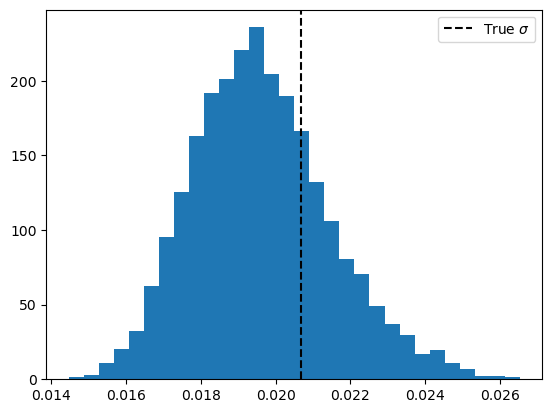

In [ ]:
# Let's draw a histogram of the samples and mark the true value of $\sigma$ as a vertical line:
plt.hist(sigma_samples, bins=30, density=True)
plt.axvline(x=sigma_batch_example[0], color='k', linestyle='--', label='True $\sigma$')
plt.legend()
plt.show()

The true value seems to be neatly within the posterior distribution.

## Neural network inference

We can now use a neural network to do inference instead. Let's target the posterior mean.

The neural network will take the data $\mathbf{x}$ as input and output an estimate of the posterior mean of $\sigma$. More precisely, we want to train $f_{\boldsymbol{\phi}}$ such that $f_{\boldsymbol{\phi}}(\mathbf{x}) \approx E[\sigma \mid \mathbf{x}]$, where $f_{\boldsymbol{\phi}}$ is a neural network with parameters $\boldsymbol{\phi}$.

We will train the network on pairs $(\sigma, \mathbf{x})$ drawn from the joint distribution. The features are the values of $\mathbf{x}$ and the target is $\sigma$. To get the neural network to target the posterior mean, we can use the mean-squared error loss function:
$$
  L(\sigma, f_\phi(\mathbf{x})) = (\sigma - f_\phi(\mathbf{x}))^2
$$

We will train this network using stochastic gradient descent. We first write a function to draw a batch of samples from the joint distribution, this time using PyTorch directly since we will use it for training:

In [ ]:
import torch
from torch import nn
from torch.nn import functional as nnf

def sample_batch(batch_size):
  sigma_batch = torch.rand(batch_size) * A
  x_batch = torch.normal(0, sigma_batch.reshape(-1, 1).expand(-1, N))
  sigma_batch_tensor = sigma_batch
  x_batch_tensor = x_batch
  return sigma_batch_tensor, x_batch_tensor

sigma_batch1, x_batch1 = sample_batch(4)
print(sigma_batch1.shape)
print(x_batch1.shape)

torch.Size([4])
torch.Size([4, 64])


The sigma and x are now tensors, and have a batch dimension as needed.

Let us draw a test set with 1024 samples in order to evaluate the performance of the neural network:

In [ ]:
sigma_test, x_test = sample_batch(1024)
print(sigma_test.shape)
print(x_test.shape)

torch.Size([1024])
torch.Size([1024, 64])


Now we define the network to solve the problem. The first thing to note is that the observations $x_i$, $i = 1, 2, \ldots, N$, are i.i.d. from a normal distribution with unknown variance $\sigma^2$. This means that the function $f_\theta(\mathbf{x})$ should give the same output for any permutation of the elements of $\mathbf{x}$ (we say it is permutation invariant).

To make such a network, we can use the following strategy:
- Compute a set of "summary statistics" for each observation $x_i$, $i = 1, 2, \ldots, N$, using a neural network.
- Sum the summary statistics across all observations to get a single vector of summary statistics.
- Feed the vector of summary statistics into a final neural network to give the output
- Take the softplus of the output to ensure the output is positive (since $\sigma > 0$).

For both networks will will simply use dense multi-layer perceptrons (MLPs). We can define the network in PyTorch as follows:

In [ ]:
class MLP(nn.Module):
  '''
  A simple MLP with two hidden layers.
  '''
  def __init__(self, input_dim, output_dim, hidden_dim):
    super().__init__()
    self.nn = nn.Sequential(
      nn.Linear(input_dim, hidden_dim),
      nn.ReLU(),
      nn.Linear(hidden_dim, hidden_dim),
      nn.ReLU(),
      nn.Linear(hidden_dim, output_dim)
    )
    
  def forward(self, x):
    return self.nn(x)
    

class PosteriorMeanEstimator(nn.Module):
    def __init__(
        self,
        summary_stats=32,
        summary_width=32,
        estimator_width=32
    ):
        super().__init__()

        # MLP summary layer
        self.summary = MLP(1, summary_stats, hidden_dim=summary_width)
        # MLP estimator layer
        self.estimator = MLP(summary_stats, 1, hidden_dim=estimator_width)

    def forward(self, x):
        # We add an extra dimension to the input, so that the MLP will be applied to each observation
        x_summary = self.summary(x.unsqueeze(-1))
        # We sum the summary statistics across all observations, then apply the estimator
        x_estimate = self.estimator(x_summary.sum(-2))
        # The softplus ensures that the output is positive
        return nnf.softplus(x_estimate.squeeze(-1))
    
posterior_mean_estimator = PosteriorMeanEstimator()

# Try the untrained network on a batch of data
output = posterior_mean_estimator(x_batch1)
print(output)

# Calculate the test loss for the untrained network
loss_fn = torch.nn.MSELoss()
test_output = posterior_mean_estimator(x_test)
test_loss = loss_fn(test_output, sigma_test)
print(test_loss)


tensor([0.1804, 0.1610, 0.0553, 0.2317], grad_fn=<SoftplusBackward0>)
tensor(31.2713, grad_fn=<MseLossBackward0>)


Now we set up the training loop. We use a very conventional scheme:
- For each epoch, we sample a set of data from the joint distribution containing a set of batches.
- For each batch, we update the parameters of the neural network using the mean-squared error loss function.
- We repeat this for a fixed number of epochs.
- After each epoch, we evaluate the performance of the neural network on a test set to assess convergence.

Unlike many neural network problems, we can refresh the data for each epoch, so we don't have to worry about overfitting.

In [ ]:
n_epochs = 128
n_batches_per_epoch = 128
training_batch_size = 128

# Set up optimizer
optimizer = torch.optim.Adam(posterior_mean_estimator.parameters(), lr=0.00001)

# Training loop
for epoch in range(n_epochs):
    epoch_loss = 0.0

    sigma_epoch_batches, x_epoch_batches = sample_batch(n_batches_per_epoch * training_batch_size)
    
    for batch_idx in range(n_batches_per_epoch):
        # Sample a batch
        batch_idx_start = batch_idx * training_batch_size
        batch_idx_end = batch_idx_start + training_batch_size
        sigma_batch = sigma_epoch_batches[batch_idx_start:batch_idx_end]
        x_batch = x_epoch_batches[batch_idx_start:batch_idx_end]
        
        optimizer.zero_grad()
        sigma_pred = posterior_mean_estimator(x_batch)
        loss = loss_fn(sigma_pred, sigma_batch)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    avg_epoch_loss = epoch_loss / n_batches_per_epoch
    with torch.no_grad():
        sigma_pred_test = posterior_mean_estimator(x_test)
        test_loss = loss_fn(sigma_pred_test, sigma_test).item()
    
    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {avg_epoch_loss:.4f}, Test Loss: {test_loss:.4f}")


Epoch 1/128, Train Loss: 26.1978, Test Loss: 17.6784
Epoch 2/128, Train Loss: 11.8394, Test Loss: 6.2859
Epoch 3/128, Train Loss: 3.9495, Test Loss: 2.1168
Epoch 4/128, Train Loss: 1.4028, Test Loss: 0.8666
Epoch 5/128, Train Loss: 0.6862, Test Loss: 0.5131
Epoch 6/128, Train Loss: 0.4439, Test Loss: 0.3662
Epoch 7/128, Train Loss: 0.3486, Test Loss: 0.3001
Epoch 8/128, Train Loss: 0.2992, Test Loss: 0.2716
Epoch 9/128, Train Loss: 0.2858, Test Loss: 0.2604
Epoch 10/128, Train Loss: 0.2738, Test Loss: 0.2561
Epoch 11/128, Train Loss: 0.2705, Test Loss: 0.2544
Epoch 12/128, Train Loss: 0.2719, Test Loss: 0.2534
Epoch 13/128, Train Loss: 0.2672, Test Loss: 0.2527
Epoch 14/128, Train Loss: 0.2671, Test Loss: 0.2520
Epoch 15/128, Train Loss: 0.2668, Test Loss: 0.2514
Epoch 16/128, Train Loss: 0.2658, Test Loss: 0.2507
Epoch 17/128, Train Loss: 0.2691, Test Loss: 0.2502
Epoch 18/128, Train Loss: 0.2646, Test Loss: 0.2499
Epoch 19/128, Train Loss: 0.2659, Test Loss: 0.2487
Epoch 20/128, Trai

We now plot the test set and the predicted values from the neural network:

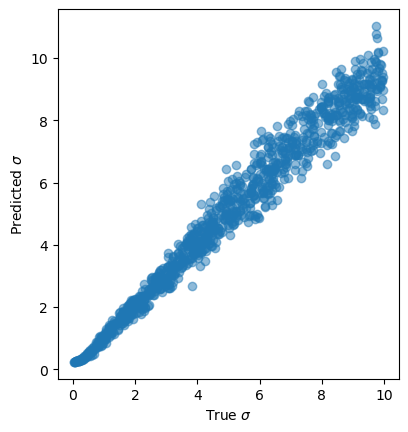

In [ ]:
sigma_pred_test = posterior_mean_estimator(x_test)

# Plot the test set and the predicted values, aspect ratio 1:1
plt.scatter(sigma_test.detach().numpy(), sigma_pred_test.detach().numpy(), alpha=0.5)
plt.xlabel('True $\sigma$')
plt.ylabel('Predicted $\sigma$')
plt.gca().set_aspect('equal', 'box')
plt.show()

This looks promising - the neural network seems to have some ability to predict $\sigma$ from $\mathbf{x}$.

## Comparing the neural network to MCMC

Let's compare the gold-standard MCMC posterior means. First, we run Stan for each batch in the test set (this takes a while):

In [ ]:
import logging

# This disables the cmdstanpy logging
cmdstanpy_logger = logging.getLogger("cmdstanpy")
cmdstanpy_logger.disabled = True

sigma_mcmc_mean_test = np.zeros(1024)

# Run stan for each batch in the test set
for i in range(1024):
  fit_batch = model.sample(data={'N': N, 'x': x_test.detach().numpy()[i], 'A': A}, chains=4, show_progress=False, parallel_chains=4)
  sigma_mcmc_mean_test[i] = fit_batch.stan_variable('sigma').mean()

Let's calculate the test set MSE for both the MCMC and the neural network:

In [ ]:
mse_mcmc = np.mean((sigma_mcmc_mean_test - sigma_test.detach().numpy()) ** 2)
mse_nn = np.mean((sigma_pred_test.detach().numpy() - sigma_test.detach().numpy()) ** 2)
print(f"MCMC MSE: {mse_mcmc:.4f}")
print(f"NN MSE: {mse_nn:.4f}")

MCMC MSE: 0.1947
NN MSE: 0.2136


Now we plot the test set, the MCMC predictions, and the neural network predictions:

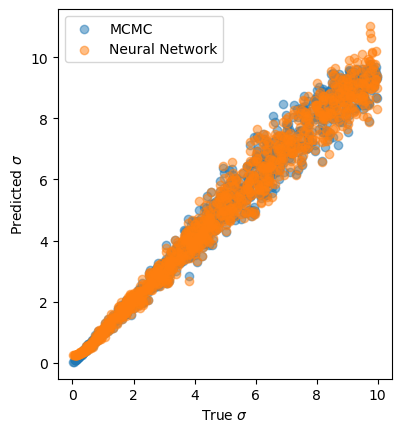

In [ ]:
plt.scatter(sigma_test.detach().numpy(), sigma_mcmc_mean_test, alpha=0.5, label='MCMC')
plt.scatter(sigma_test.detach().numpy(), sigma_pred_test.detach().numpy(), alpha=0.5, label='Neural Network')
plt.xlabel('True $\sigma$')
plt.ylabel('Predicted $\sigma$')
plt.gca().set_aspect('equal', 'box')
plt.legend()
plt.show()


In theory, the neural network should be an estimate of the MCMC mean itself, since they are targeting the same quantity. Plot them together to see how they compare:

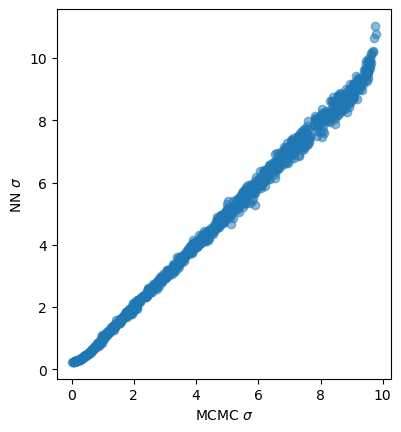

In [ ]:
plt.scatter(sigma_mcmc_mean_test, sigma_pred_test.detach().numpy(), alpha=0.5)
plt.xlabel('MCMC $\sigma$')
plt.ylabel('NN $\sigma$')
plt.gca().set_aspect('equal', 'box')
plt.show()

These are pretty close. There are some disagreements at the boundary of the parameter space. This is probably an issue with the neural network, since it has the least training data near the boundary.

The concludes the example. 

## Questions

1. Try changing $N$ to be larger or smaller. What changes?
2. The performance of the neural network is close but not as good as MCMC. Try thing to narrow the gap: e.g., increase the width of the network, increase the number of epochs, change batch size, change the learning rate, etc.
3. If you change the loss function to mean absolute error, the neural network will target the posterior median instead of the posterior mean. Try this and compare to MCMC.
4. If you change the loss function to the quantile loss (you can look up what this is), the NN will target a posterior quantile. Try this too.